<a href="https://colab.research.google.com/github/DanielEscobar01/FlightPricePrediction/blob/main/Flight_Fare_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THE MACHINE LEARNING PROBLEM**

**DESCRIPTION OF THE PROBLEM**


During these times the aviation industry has been growing despite the closures of borders due to the pandemic, this has led people to look for apps to get flights as cheap as possible. In this case, we have focused on a database with flights in the Republic of India, with which we intend to create a predictive regression model to estimate the value of a ticket as accurately as possible. It is important to clarify that the purpose is to estimate the price of the plane ticket, not its rise or fall.


# **VARIABLES** 

In this database we can find the following variables: 

- **Airline** (Categorical)
- **Date** 
- **Origin** (Categorical)
- **Destination** (Categorical)
- **Departure** Time (It is not the take off time, this means the time when the airplane leaves the gate)
- **Arrival** **Time**
- **Duration**
- **Total** **Stops** (Categorical)
- **Additional** **Information** (Categorical)
- **Price** (Dependent Variable)




In [ ]:
import pandas as pd                                                 ## Import pandas library
dataframe = pd.read_excel("Data_Train.xlsx")                        ## Creating the dataframe from dataset (xlsx)
dataframe.head()                                                    ## Looking for the first 5 rows of the dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# EMPTY VALUES

The dataset has 2 empty values, one in the route column and one in the total stop’s column, since these empty values are minimal, we drop both rows. 
The model is going to use the first 9 variables to make a prediction for the last variable (Price).


In [ ]:
dataframe.isnull().sum()                                            ## Looking for empty values in the columns

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
dataframe.dropna(inplace= True)                                     ## Deleting the rows with empty values 
dataframe.isnull().sum()                                            ## Looking for empty values in the columns again to double check there's no empty values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# **CLEANING DATA**

- The variable Date is defined as an object, then we convert it into a Date value to make a proper prediction. 


- The following process creates two new variables, Day of Travel and Month of Travel. (There is no need for year because the model is supposed to work for every year and only depend on the day and month of the year in course)





In [ ]:
dataframe["Journey_day"] = pd.to_datetime(dataframe.Date_of_Journey, format="%d/%m/%Y").dt.day              ## Creating new column with day value from Date column
dataframe["Journey_month"] = pd.to_datetime(dataframe["Date_of_Journey"], format = "%d/%m/%Y").dt.month     ## Creating new column with month value from Date column
dataframe.drop(["Date_of_Journey"], axis = 1, inplace = True)                                               ## Deleting Date column because we already have day and month values
dataframe                                                                                                   ## Printing dataframe to double check the process

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


- The variables Departure Time and Arrival Time are defined as an object, then we convert them into a time value. After this conversion, we extract the values of hour and time for each variable, creating then Departure Hour, Departure Minute, Arrival Hour, Arrival Minute.

In [ ]:
## Process for Departure Time
dataframe["Dep_hour"] = pd.to_datetime(dataframe["Dep_Time"]).dt.hour                             ## Creating new column with hour value from Departure Time column
dataframe["Dep_min"] = pd.to_datetime(dataframe["Dep_Time"]).dt.minute                            ## Creating new column with minute value from Departure Time column
dataframe.drop(["Dep_Time"], axis = 1, inplace = True)                                            ## Deleting Departure time column because we already have minute and hour values    

## Process for Arrival Time
dataframe["Arrival_hour"] = pd.to_datetime(dataframe.Arrival_Time).dt.hour                        ## Creating new column with hour value from Arrival Time column
dataframe["Arrival_min"] = pd.to_datetime(dataframe.Arrival_Time).dt.minute                       ## Creating new column with minute value from Arrival Time column
dataframe.drop(["Arrival_Time"], axis = 1, inplace = True)                                        ## Deleting Arrival time column because we already have minute and hour values

dataframe                                                                                         ## Printing dataframe to double check the process

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


- The variable Duration is an object, so we extract the values from the object, creating then two new variables, Duration Hours and Duration Minutes, these ones are defined as integers. 

- For this "Extraction" we create a function to get duration values (Hours and minutes)

In [ ]:
def get_duration(x):                                                                            ## Define the function
    x=x.split(' ')                                                                              ## Split x with empty space
    hours=0                                                                                     ## Initialize variable hours
    minutes=0                                                                                   ## Initialize variable minutes
    if len(x)==1:                                                                               ## If the length of the parameter is 1
        x=x[0]                                                                                  ## Assign x the value of x[0] 
        if x[-1]=='h':                                                                          ## If the last value of x is h, that means minutes is equal to 0
            hours=int(x[:-1])                                                                   ## Assign the value to hours
        else:                                                                                   ## If the last value is different than h, that means we have a minute value different than 0
            minutes=int(x[:-1])                                                                 ## Assign the value of minutes after checking if it is 0 or other value
    else:                                                                                       ## If the lenght of the parameter is different than 1
        hours=int(x[0][:-1])                                                                    ## Assign to hours the value of the first position of the parameter
        minutes=int(x[1][:-1])                                                                  ## Assign to minutes the value of the second position of the parameter
    return hours,minutes                                                                        ## Then return the values hours and minutes


dataframe['Duration_hours']=dataframe.Duration.apply(lambda x:get_duration(x)[0])               ## Creating new column with hour value from Duration column
dataframe['Duration_mins']=dataframe.Duration.apply(lambda x:get_duration(x)[1])                ## Creating new column with minutes value from Duration column
dataframe.drop(["Duration"], axis = 1, inplace = True)                                          ## Deleting Duration column because we already have minute and hour values

dataframe                                                                                       ## Printing dataframe to double check the process 

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


#**HANDLING CATEGORICAL DATA**

- The first thing we have to talk about is data encoding, what is data encoding? and how it could help to solve the problem?

# ENCODING

- Encoding is the process of converting the data (In this case categorical data) or a given sequence of characters, into a specified format, for the secured transmission of data. There are multiple ways to encode variables, for this project we are going to use one hot encoding and label encoder. 



# ONE HOT ENCODING

- One hot encoding is used for categorical variables where there's no order in the data, for example colors, countries or in this case, airlines. This encoding process let us create new columns for each variable, were we are going to fill with 0 (This mean there is no presence of the variable in the sample) and 1 (This mean there's presence of the variable in the sample)

In [ ]:
Airline = dataframe[["Airline"]]                                      ## Getting the column Airline 
Airline = pd.get_dummies(Airline, drop_first= True)                   ## Converting categorical values
Source = dataframe[["Source"]]                                        ## Getting the column Source
Source = pd.get_dummies(Source, drop_first= True)                     ## Converting categorical values 
Destination = dataframe[["Destination"]]                              ## Getting the column Destination
Destination = pd.get_dummies(Destination, drop_first = True)          ## Converting categorical values

# **ROUTE VARIABLE**

- Route variable shows the stops or layovers in the journey, but we already have total stops variable to know this information (If the flight is direct or the number of stops it takes) so we deleted this column.

In [ ]:
dataframe.drop(["Route"], axis = 1, inplace = True)                                                        ## Deleting the column Route because we do not need that one anymore

# LABEL ENCODING

- Label encoding is used for categorical variables where there is order in the data, in this case we have the number of layovers (nonstop , 1 stop, 2 stops, 3 stops), then after use the label encoder the values of this variables are going to change in the following way: 


- Nonstop → 0
- 1 Stop → 1
- 2 Stops → 2
- 3 Stops → 3

In [ ]:
dataframe["Total_Stops"].unique()                                                                           ## Getting unique values from Total Stops
dataframe.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)   ## Replacing the values for numbers

- Additional Information is also a categorical value, so we need to convert the values to numbers.

- At first we are replacing the values for its name, but this lets us know that No info value is repeated, for that reason, we have to replace these values.


In [ ]:
dataframe["Additional_Info"].unique()                                                                       ## Getting unique values from Additional Info stops                       
dataframe["Additional_Info"].replace({"No info": 'No Info'}, inplace = True)                                ## Replacing the values for the name in the value

- After this process this variable is still categorical, so we can use the process that we used before to convert this categorical value into a numerical one.


In [ ]:
Add_info = dataframe[["Additional_Info"]]                                                                   ## Getting the column Additional Info                        
Add_info = pd.get_dummies(Add_info, drop_first = True)                                                      ## Converting categorical values

## **DATAFRAME AFTER CLEANING**

- Finally we have cleaned all our data, so we put all the right values into the dataframe


In [ ]:
dataframe = pd.concat([dataframe, Airline, Source, Destination,Add_info], axis = 1)                         ## Concatenate the columns we just created with right values
dataframe.drop(["Airline", "Source", "Destination","Additional_Info"], axis = 1, inplace = True)            ## Deleting all categorical columns
dataframe                                                                                                   ## Printing dataframe to double check the process                          

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10679,0,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10680,0,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
10681,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


# **MODEL BUILDING**



### Now, we can do the models building, in this case, the first one will be the RandomForestRegressor model



## - The first step is separate the dataset in X and Y columns. Then we spiliting the dataset for training and test dates (20% of total data).

In [ ]:
X=dataframe.drop('Price',axis=1)                                                              # Separated the data in X column
y=dataframe['Price']                                                                          # Separated the data in y column
#train-test split
from sklearn.model_selection import train_test_split                                          # import the library tran_test_split from sklearn
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)  # we split the data, distributed 20% for test and 80% for training the model 

- We can check the set that we want to see after the spiliting

In [ ]:
print(x_train.shape)
print(x_test.shape)

(8545, 37)
(2137, 37)


- The next instruction was necessary because there is one problem with the sklearn version in Colab

In [ ]:
pip install --upgrade scikit-learn  


- We create a definition that will help us showing all information needed in the evaluation of a model. For example, the RMSE, MAE or MSE score, finally we show a graphic using the seaborn library which shows how much percentage of predictive success was obtained 

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error                       # We import the performance metrics from sklearn library
import numpy as np                                                                                # We import the numpy library for to use the sqrt function  
import seaborn as sns                                                                             # We import the seaborn library for to draw a graphic with the result of the model
def predictResult(ml_model):   
    results = pd.DataFrame()                           
    print('Model is: {}'.format(ml_model))                                                        # Print the name of the model
    print('\n')                                                                                   # Space jump
    model= ml_model.fit(x_train,y_train)                                                          # Fit our model with the set of training
    print("Training score: {}".format(model.score(x_train,y_train)))                              # Show the training score obtained
    modelTest = ml_model.fit(x_test,y_test)                                                       # Fit our model with the set of testing
    print("Test score: {}".format(modelTest.score(x_test,y_test)))                                # Show the testing score obtained
    predictions = model.predict(x_test)                                                           # Do the predictions with the set of test                                                                  
    print("Predictions are: {}".format(predictions))                                              # show all predictions done
    print('\n')                                                                                   # space jump
    results.loc['R2 SCORE',''] =  r2score=r2_score(y_test,predictions)                            # Show in a table the r2 score for the test set
    results.loc['RMSE SCORE',''] = np.sqrt(mean_squared_error(y_test,predictions))                # Show in a table the rmse score for the test set                                                                  
    sns.distplot(y_test-predictions)                                                              # Plot the graphic in which we can observe the amount of predictive success that was obtained
    print('\n')                                                              
    return results


- We evaluate the model

Model is: RandomForestRegressor(random_state=42)


Training score: 0.9824984652454539
Test score: 0.9748027412209553
Predictions are: [14684.6   5950.25  3625.76 ... 10079.19  9858.17  3978.82]






/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


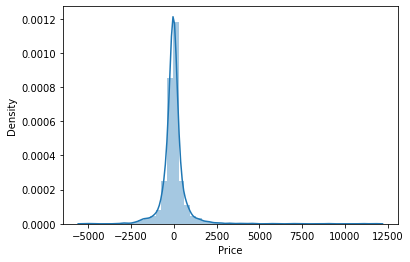

In [ ]:
from sklearn.ensemble import RandomForestRegressor                                                            # We import the model from sklearn library
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)                                      # We instance the model
result = predictResult(regressor)                                                                             # We test the model

- In this case,it can see that the model has a 0.97 in the score.
- The RMSE is 768.9
- The percentage of training score was of 98%


In [ ]:
result                       

,
R2 SCORE,0.974803
RMSE SCORE,768.900313


### The model obtained a very good score, so, we didn't hypertunning the model, for us, was not necessary

In [ ]:
predictions = regressor.predict(x_test)                                                    
df = pd.DataFrame({'Actual': y_test, 'Predicted':predictions})
df.head(4)         

,Actual,Predicted
10507,14781,14684.60
7705,5636,5950.25
7700,3597,3625.76
1437,16757,16203.39
8884,4804,4725.55
4041,8586,8342.74
9635,12242,12377.02
7620,7001,7149.08


### - Finally we can check a table which is evident that the model works good

### MULTIPLE REGRESSION MODEL

Model is: LinearRegression()


Training score: 0.6997715231064535
Test score: 0.6685494369633689
Predictions are: [13152.27013417  6934.39926216  2603.55045253 ... 11284.90785785
  9647.14956553  4520.56344737]






/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


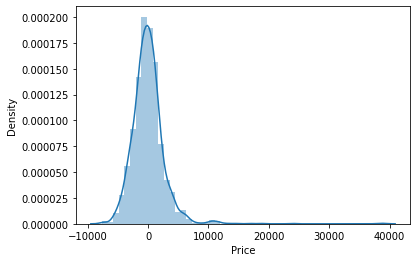

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
result = predictResult(regr)

In [ ]:
result

,
R2 SCORE,0.668549
RMSE SCORE,2788.706251


In [ ]:
y_pred = regr.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(4)

,Actual,Predicted
10507,14781,13152.270134
7705,5636,6934.399262
7700,3597,2603.550453
1437,16757,16028.946303
8884,4804,5717.401233
4041,8586,9840.297970
9635,12242,13571.077794
7620,7001,9905.246387


In this model isn't posible to do the hypertunning. Exits some variants for this model but those were not request by the report.


### PARZEN WINDOW MODEL


We tried to do this model, but was not possible to finish it succesfully

In [ ]:
from scipy.spatial import distance
def kernel_gaussiano(x):
    """Calcula el kernel gaussiano de x
    x: matriz/vector de numpy
    retorna: el valor de de kernel gaussiano
    """
    return np.exp((-0.5)*x**2)

def ErrorClas(Y_lest, Y):
    """funcion que calcula el error de clasificación
    Y_lest: numpy array con la estimaciones de etiqueta
    Y: etiquetas reales
    retorna: error de clasificación (int)
    """
    error = 1 - np.sum(Y_lest == Y)/len(Y)
    
    return error

def ParzenWindow(x,Data,h):
    """"ventana de parzen
    x: vector con representando una sola muestra
    Data: vector de muestras de entrenamiento
    h: ancho de la ventana de kernel
    retorna: el valor de ventana de parzen para una muestra
    """
    h = h
    Ns = Data.shape[0]
    suma = 0
    for k in range(Ns):
        u = distance.euclidean(x,Data[k,:])
        suma += kernel_gaussiano(u/h)
    return suma

In [ ]:
#Ejercicio de código
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error  
import numpy as np
from scipy.spatial import distance_matrix 
def Nadaraya_Watson(X_train, Y_train, X_test, h):
    
    """ Funcion que implementa metodo de ventana de parzen para
        para clasificación
    X_train: es la matriz con las muestras de entrenamiento
    Y_train: es un vector con los valores de salida pra cada una de las muestras de entrenamiento
    X_test: es la matriz con las muestras de validación
    h (float): ancho de h de la ventana
    retorna: - las estimaciones del modelo parzen para el conjunto X_test 
              esta matriz debe tener un shape de [row/muestras de X_test]
             - las probabilidades de la vetana [row/muestras de X_test, numero de clases]  
    """
        
    Yest = np.zeros(X_test.shape[0])
    distancias = (distance_matrix(X_test, X_train))/h
    for i in range(len(X_test)):
        k = kernel_gaussiano(distancias[i])
        x = np.sum(np.multiply(k, Y_train))
        y = np.sum(k)
        Yest[i] = x/y
    #Debe retornar un vector que contenga las predicciones para cada una de las muestras en X_val, en el mismo orden.  
    return Yest

In [ ]:
from sklearn.model_selection  import KFold

def searchParamsParzen (X_Train, Y_Train, hs):
  
    skf = KFold(n_splits=4)
    resultados = pd.DataFrame()
    idx = 0

    for h in hs:
        error_temp = []
        r2score = []
        recallV = []
        precisionV = []
        for train, test in skf.split(X_Train, Y_Train):

            XtrainSplit, YtrainSplit = X_Train.iloc[train], Y_Train.iloc[train]
            XtestSplit, YtestSplit = X_Train.iloc[test], Y_Train.iloc[test]

            Yest = Nadaraya_Watson(XtrainSplit,YtrainSplit,XtestSplit,h)
            errorTest = ErrorClas(Yest,YtestSplit)
            error_temp.append(errorTest)
            r2score.append(r2_score(YtestSplit, Yest))      
     
        resultados.loc[idx,'ancho de ventana'] = h 
        resultados.loc[idx,'error de prueba(media)'] = np.mean(error_temp)
        #resultados.loc[idx,'error de prueba(desviación estandar)'] = np.std(error_temp)
        resultados.loc[idx,'Eficiencia Validacion'] = '' +  str(np.mean(error_temp))     + ' +/- ' + str(np.std(error_temp))
        resultados.loc[idx,'accuracy'] = np.mean(r2score)
        idx+=1
    return (resultados)

In [ ]:
hs = [1,1.5 ,3, 3.5, 10]
predictions_parzen = searchParamsParzen(x_train,y_train, hs)
predictions_parzen

,ancho de ventana,error de prueba(media),Eficiencia Validacion,accuracy
0,1.0,0.996255,0.9962551197993617 +/- 0.0008758564586439162,0.558693
1,1.5,0.999883,0.9998829588014981 +/- 0.00020272130238398628,0.580623
2,3.0,1.000000,1.0 +/- 0.0,0.604975
3,3.5,1.000000,1.0 +/- 0.0,0.598452
4,10.0,1.000000,1.0 +/- 0.0,0.297103


###NEURAL NETWORK

Model is: MLPRegressor()


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Training score: 0.5039999387185718
2137
Predictions are: [11039.40086545  6864.90509709  4927.35300837 ... 11486.62347585
  9208.13958707  6228.59448823]


r2 score is: 0.47293053684186415
RMSE:3516.635186453844




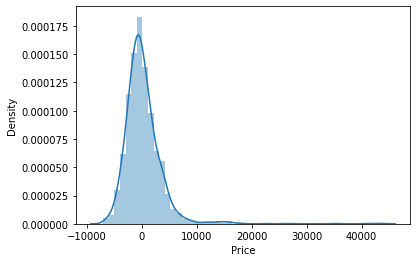

In [ ]:
from sklearn.neural_network import MLPRegressor            # We import the model from sklearn library
model = MLPRegressor(max_iter=200)                         # We instance the model
result = predictResult(model)                              # We test the model                                                                      

Hypertunning the model with GridSearchCV for to know what are the best params for the model 

In [ ]:
import itertools                                                                                                                                #SE DEMORA BASTANTE (1hora, 46 minutos aproximadamente)
from sklearn.model_selection import GridSearchCV
params = {'activation': ['relu', 'tanh'], # 'logistic', 'identity'
          'hidden_layer_sizes': list(itertools.permutations([50,100],2)) + list(itertools.permutations([50,100],3)) + [50,100,150],
          'solver': ['adam'], # 'lgth'
          'learning_rate' : ['constant'], #'adaptive', 'invscaling'
          'max_iter':[4000]
         }

mlp_regressor_grid = GridSearchCV(MLPRegressor(random_state=123), param_grid=params, n_jobs=-1, cv=5, verbose=5)
mlp_regressor_grid.fit(x_train,y_train)

print('Train R^2 Score : %.3f'%mlp_regressor_grid.best_estimator_.score(x_train, y_train))
print('Test R^2 Score : %.3f'%mlp_regressor_grid.best_estimator_.score(x_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%mlp_regressor_grid.best_score_)
print('Best Parameters : ',mlp_regressor_grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Train R^2 Score : 0.868
Test R^2 Score : 0.817
Best R^2 Score Through Grid Search : 0.822
Best Parameters :  {'activation': 'relu', 'hidden_layer_sizes': (50, 100), 'learning_rate': 'constant', 'max_iter': 4000, 'solver': 'adam'}


In [ ]:
result

Then we use the params obtained, and the score of the model is so much better than the previous score

In [ ]:
mlpBest = MLPRegressor(activation='relu', hidden_layer_sizes= (100,50), learning_rate='constant',solver= 'adam',max_iter=4000)  # aqui se ponen los parametros q retorna la celda anterior
mlpBest.fit(x_train,y_train)                                                                                                    # como se puede ver, se obiene un resultado mucho mejor q con la primera prueba  
predictions = mlpBest.predict(x_test)                                                                                           # de 0.47 en r2 pasamos a 0.82 y del error en 3516 pasamos a 2027  
r2score=r2_score(y_test,predictions)                                                          
df = pd.DataFrame({'Actual': y_test, 'Predicted':predictions})
df.head(4)     


r2 score is: 0.8248479345239864
RMSE:2027.2206486588368
Predictions are: [14706.87338303  6520.03371507  3345.82907774 ... 11777.47288884
  9359.49724774  4193.64470482]


,Actual,Predicted
10507,14781,14706.873383
7705,5636,6520.033715
7700,3597,3345.829078
1437,16757,19355.378121
8884,4804,4922.672307
4041,8586,9732.540001
9635,12242,12942.837299
7620,7001,8313.786924


### Now, we can do the last model, in this case, will be the SVR model (Support Vector Regression with kernel rbf)

We use the GridSearchCV again for to know what are the best params for the model

### The next cell takes a long time to run, exactly (18 hrs and 46 minutes) around 19 hours

In [ ]:
"""from sklearn.svm import SVR

#params= {'kernel':'rbf', 'C':(0.05,0.5,1,1.5,2,2.5,3,3.5,4,5), 'gamma':(0.01,0.05,0.1,0.5,1,2)}
params= {'kernel':'rbf', 'C':(5,10,100,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,7000), 'gamma':(0.01,0.05,0.1,0.5,1)}
modelsvr = SVR()
grids = GridSearchCV(modelsvr,param,cv=3,n_jobs=-1,verbose=2, refit= 'false')
grids.fit(x_train,y_train)
print(grids.best_params_)"""

"from sklearn.svm import SVR\n\nparam = {'kernel' : 'rbf','C' : (1,5,10,100,1000,100000), 'gamma' : (0.01,0.05,0.1,1)}\nmodelsvr = SVR()\ngrids = GridSearchCV(modelsvr,param,cv=3,n_jobs=-1,verbose=2, refit= 'false')\ngrids.fit(x_train,y_train)\nprint(grids.best_params_)"

### We create the model with the params choosed by GridSearchCV

Model is: SVR(C=5000, gamma=1)


Training score: 0.820561545528955
Test score: 0.770595261712761
Predictions are: [13807.89150375  5636.09983095  3807.27445473 ...  8970.90000322
  9662.90002747  3873.09948752]






/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


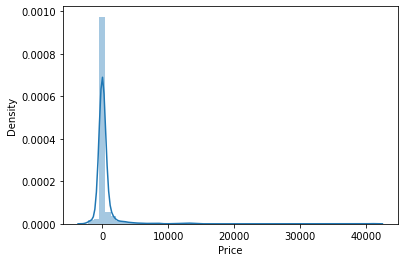

In [ ]:
from sklearn.svm import SVR
modelsvr = SVR(kernel='rbf', C = 5000, gamma = 1)
result = predictResult(modelsvr)

In [ ]:
result

,
R2 SCORE,0.770595
RMSE SCORE,2320.035240


In [ ]:
y_pred = modelsvr.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(4)

,Actual,Predicted
10507,14781,13807.891504
7705,5636,5636.099831
7700,3597,3807.274455
1437,16757,13807.891504


## RESULTS OBTAINED

In this section we have all results for the best models

In [ ]:
bestResults = pd.DataFrame()
bestResults.loc['R2 SCORE','RandomForest'] = 0.974                          
bestResults.loc['RMSE SCORE','RandomForest'] = 768.900
bestResults.loc['R2 SCORE',''] = ' '                         
bestResults.loc['RMSE SCORE',''] = ' '
bestResults.loc['R2 SCORE','Neural Network'] = 0.824                      
bestResults.loc['RMSE SCORE','Neural Network'] = 2027.220
bestResults.loc['R2 SCORE',''] = ' '                         
bestResults.loc['RMSE SCORE',''] = ' '
bestResults.loc['R2 SCORE','SVR'] = 0.770                     
bestResults.loc['RMSE SCORE','SVR'] = 2320.035
bestResults   

,RandomForest,,Neural Network,SVR
R2 SCORE,0.974,,0.824,0.770
RMSE SCORE,768.900,,2027.220,2320.035


In [ ]:
bestParameters = pd.DataFrame()
bestParameters.loc['RandomForest','n_estimators'] = 100
bestParameters.loc['RandomForest','random_state'] = 42
bestParameters  

,n_estimators,random_state
RandomForest,100.0,42.0


In [ ]:
bestParameters2 = pd.DataFrame()
bestParameters2.loc['Neural Network','activation'] = 'relu'
bestParameters2.loc['Neural Network','hidden_layer_sizes'] = '[50,100]'
bestParameters2.loc['Neural Network','solver'] = 'adam'
bestParameters2.loc['Neural Network','learning_rate'] = 'constant'
bestParameters2.loc['Neural Network','max_iter'] = 4000
bestParameters2  

,activation,hidden_layer_sizes,solver,learning_rate,max_iter
Neural Network,relu,"[50,100]",adam,constant,4000.0


In [ ]:
bestParameters3 = pd.DataFrame()
bestParameters3.loc['SVR','kernel'] = 'RBF'
bestResults.loc['SVR',''] = ' '                         
bestResults.loc['SVR',''] = ' '
bestParameters3.loc['SVR','C'] = '5000'
bestResults.loc['SVR',''] = ' '                         
bestResults.loc['SVR',''] = ' '
bestParameters3.loc['SVR','gamma'] = 1
bestParameters3 

,kernel,C,gamma
SVR,RBF,5000,1.0
